# SyriaTel Customer Churn

- Which customer has hightest probability to switch to another telecom(churn)
- What could be the posible reasons why churn is happening
- How good the prediction is?

### Importing 

Import necessary libraries

In [1]:
#Exploratory 
import pandas as pd
import numpy as np

#Data Visualization 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



#Data Preprocessing 
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler,\
                                  PolynomialFeatures, LabelEncoder

#Data Modeling       
from sklearn.model_selection import train_test_split, \
                                    KFold, GridSearchCV,\
                                    cross_val_score
    
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Data Evaluation 
from sklearn.metrics import roc_curve, auc, confusion_matrix, \
                            accuracy_score, f1_score, precision_score, \
                            recall_score, roc_auc_score, classification_report,\
                            fbeta_score

from sklearn.pipeline import Pipeline
from scipy.spatial.distance import euclidean, minkowski, cityblock 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier



# Ignore any warnings
import warnings
warnings.filterwarnings('ignore')


### Data Exploration

In [2]:
# Import the dataset
df = pd.read_csv('../../../../bigml_59c28831336c6604c800002a.csv')

# Print the first five rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Good --> no missing values in the dataset


Print the summary statistics of all columns in the data:

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### Dropping phone number and area code 

In [5]:
df = df.drop(['phone number', 'area code'], axis=1)  

### Checking col churn

In [6]:
df["churn"].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Considered class imbalance? Use SMOTE? 

### Mapping Bool True/False to 1/0 churn, international plan and voice mail plan

ASK ABOUT TURNING THIS INTO 1/0 OR OHE IT BETTER
COLS TO TURN:
- state
- international plan 
- voice mail plan
- churn


In [7]:
df['churn'] = df['churn'].astype(int) 
df["international plan"] = df["international plan"].map({"yes":1,"no":0})
df["voice mail plan"] = df["voice mail plan"].map({"yes":1,"no":0})

In [8]:
df

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,0,1,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
3329,WV,68,0,0,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
3330,RI,28,0,0,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0
3331,CT,184,1,0,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,0


<AxesSubplot:>

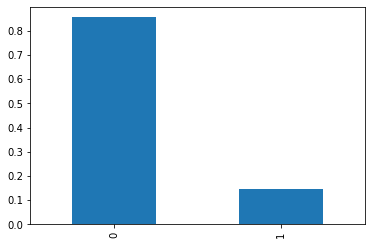

In [9]:
by_churn = df['churn'].value_counts(normalize=True )
by_churn.plot(kind='bar')

In [10]:
df["churn"].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

### Total minutes, calls and charge

In [11]:
# def combine(name, *cols):
#     "This function will name a new column and add as many columns as necessary"
#     df[name] = sum(cols)

In [12]:
# combine("total_domestic_minutes",
#         df["total day minutes"],
#         df["total eve minutes"],
#         df["total night minutes"])

In [13]:
# combine("total_domestic_calls",
#         df["total day calls"],
#         df["total eve calls"],
#         df["total night calls"])

In [14]:
# combine("total_domestic_charge",
#         df["total day charge"],
#         df["total eve charge"],
#         df["total night charge"])

In [15]:
# df.drop(columns=['total night charge','total night calls','total night minutes','total day minutes','total day calls','total day charge','total eve minutes','total eve calls','total eve charge'], inplace = True)


### Displaying states vs amount of calls

In [16]:

# # Print states with minimum amount of calls
# state_calls = df.groupby('state')['total_domestic_calls'].sum().sort_values()
# print('State with the minimum amount of calls:\n', 
#       state_calls[state_calls == state_calls[0]], 
#       sep='')
# print('~~~~~~~~~~~~~~~~~~')

# # Print states with max amount of calls
# print('State with the maximum amount of calls:\n', 
#       state_calls[state_calls == state_calls[-1]], 
#       sep='')



In [17]:
# plt.xlabel('amount of calls')
# plt.ylabel('State')
# state_calls.plot(kind='barh', 
#                  x='amount of calls', 
#                  y='State', 
#                  figsize=(20, 15), 
#                  colormap='Set2')

### State vs Churn

In [18]:
# Print states with minimum amount churn
state_churn = df.groupby('state')['churn'].sum().sort_values()
print('State with the minimum amount of churn:\n', 
      state_churn[state_churn == state_churn[0]], 
      sep='')
print('~~~~~~~~~~~~~~~~~~')

# Print states with max amount churn
print('State with the maximum amount churn:\n', 
      state_churn[state_churn == state_churn[-1]], 
      sep='')



State with the minimum amount of churn:
state
AK    3
IA    3
HI    3
Name: churn, dtype: int64
~~~~~~~~~~~~~~~~~~
State with the maximum amount churn:
state
NJ    18
TX    18
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='state'>

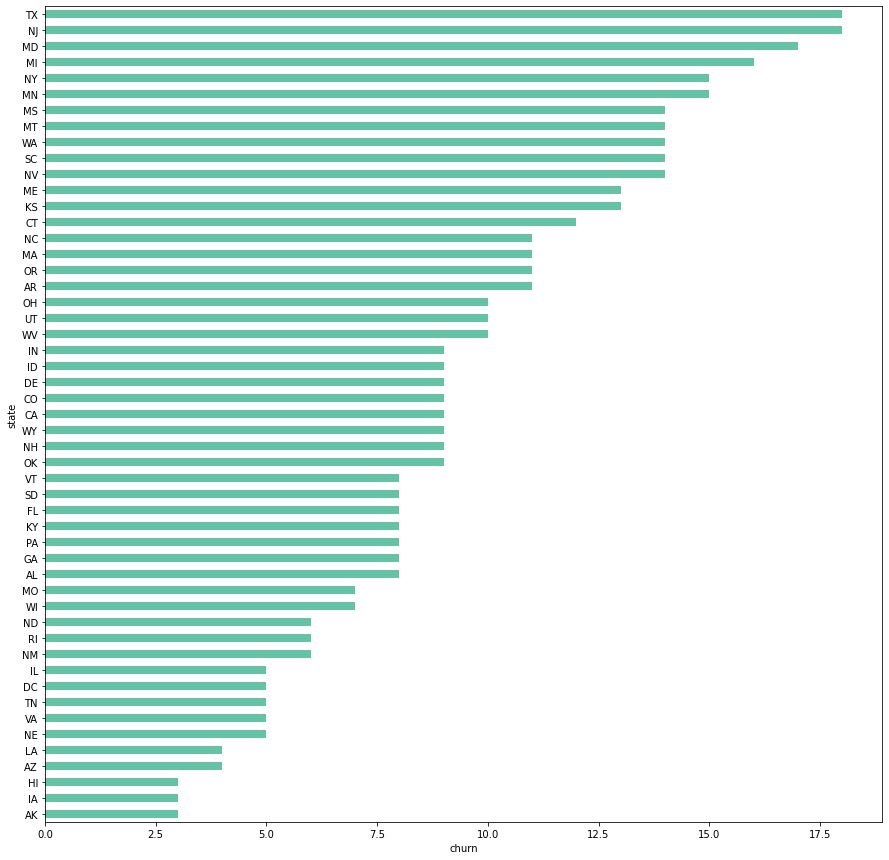

In [19]:
plt.xlabel('churn')
plt.ylabel('State')
state_churn.plot(kind='barh', 
                 x='churn', 
                 y='State', 
                 figsize=(15, 15), 
                 colormap='Set2',
            )

### State vs customer service calls

In [20]:
# Print states with minimum amount churn
state_service = df.groupby('state')['customer service calls'].sum().sort_values()
print('State with the minimum amount of customer service calls calls:\n', 
      state_service[state_service == state_service[0]], 
      sep='')
print('~~~~~~~~~~~~~~~~~~')

# Print states with max amount churn
print('State with the maximum amount customer service calls:\n', 
      state_service[state_service == state_service[-1]], 
      sep='')

State with the minimum amount of customer service calls calls:
state
CA    50
Name: customer service calls, dtype: int64
~~~~~~~~~~~~~~~~~~
State with the maximum amount customer service calls:
state
WV    159
Name: customer service calls, dtype: int64


#### Check total minutes vs total charge hue churn

### People who make a lot of international calls are purchasing an international plan? 

<AxesSubplot:xlabel='total intl calls', ylabel='count'>

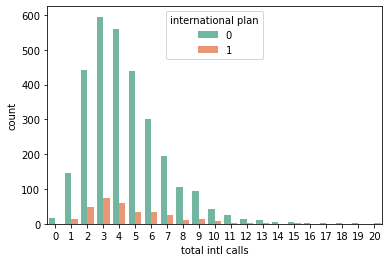

In [21]:
sns.countplot(x='total intl calls', 
              hue='international plan', 
              data=df,
              palette= "Set2")

### People who make a lot of international calls without international plan churn?

<AxesSubplot:xlabel='churn', ylabel='count'>

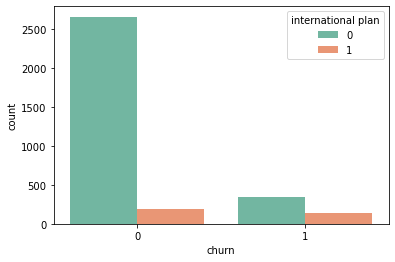

In [22]:
sns.countplot(x='churn', 
              hue='international plan', 
              data=df,
              palette= "Set2")

### People who make a lot of customer service churn?

<AxesSubplot:xlabel='customer service calls', ylabel='count'>

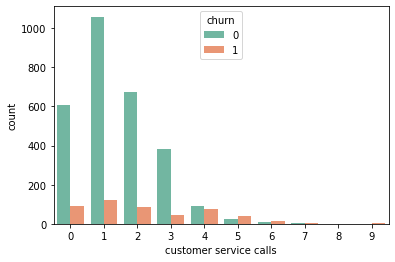

In [23]:
sns.countplot(x='customer service calls', 
              hue='churn', 
              data=df,
              palette= "Set2")

It looks like after 4 customer services call they all start to churn

In [24]:
df_service_churn = df[['churn','customer service calls']].sort_values(by = 'churn',
                                                                 ascending = False)
df_service_churn

,churn,customer service calls
1784,1,0
588,1,5
546,1,2
547,1,5
550,1,4
...,...,...
1181,0,1
1183,0,2
1184,0,2
1185,0,3


In [25]:
df.groupby(by=['churn','customer service calls']).agg(['mean','count'])

account length       international plan        \
                                       mean count               mean count   
churn customer service calls                                                 
0     0                          101.550413   605           0.072727   605   
      1                          101.386213  1059           0.067989  1059   
      2                           99.197917   672           0.056548   672   
      3                          100.142857   385           0.059740   385   
      4                          100.333333    90           0.100000    90   
      5                          109.192308    26           0.000000    26   
      6                          100.875000     8           0.000000     8   
      7                          125.000000     4           0.000000     4   
      8                           64.000000     1           0.000000     1   
1     0                           99.673913    92           0.423913    92   
      1                          105.196721   122           0.327869   122   
      2                           99.436782    87           0.275862    87   
      3                          112.727273    44           0.340909    44   
      4                          105.421053    76           0.157895    76   
      5                           98.250000    40           0.150000    40   
      6                           84.071429    14           0.000000    14   
      7                          109.000000     5           0.000000     5   
      8                          103.000000     1           0.000000     1   
      9                          102.500000     2           0.500000     2   

                             voice mail plan       number vmail messages  \
                                        mean count                  mean   
churn customer service calls                                               
0     0                             0.297521   605              8.745455   
      1                             0.307838  1059              8.890463   
      2                             0.302083   672              8.736607   
      3                             0.236364   385              7.023377   
      4                             0.288889    90              8.500000   
      5                             0.384615    26             10.730769   
      6                             0.375000     8             11.125000   
      7                             0.500000     4             17.250000   
      8                             1.000000     1             40.000000   
1     0                             0.141304    92              4.184783   
      1                             0.147541   122              4.467213   
      2                             0.137931    87              4.850575   
      3                             0.159091    44              5.090909   
      4                             0.210526    76              6.315789   
      5                             0.175000    40              5.000000   
      6                             0.428571    14             13.928571   
      7                             0.000000     5              0.000000   
      8                             0.000000     1              0.000000   
      9                             0.500000     2             10.000000   

                                   total day minutes        ...  \
                             count              mean count  ...   
churn customer service calls                                ...   
0     0                        605        174.694215   605  ...   
      1                       1059        173.642587  1059  ...   
      2                        672        170.452530   672  ...   
      3                        385        178.892468   385  ...   
      4                         90        202.346667    90  ...   
      5                         26        215.307692    26  ...   
      6                          8  

### Numeric cols / any correlation ?

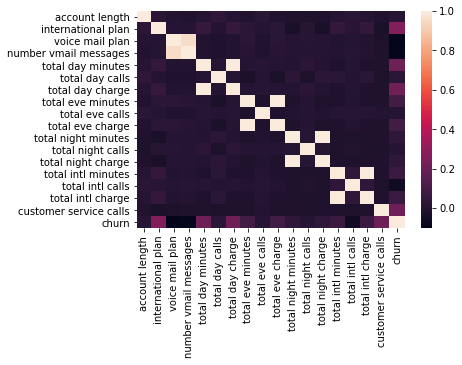

In [26]:
numeric = [col for col in df.columns if df.dtypes[col] == np.int64 or df.dtypes[col] == np.float64]
sns.heatmap(df[numeric].corr());


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   int64  
 3   voice mail plan         3333 non-null   int64  
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

In [28]:
#Get the highest correlation 
corr_abs = df.corr().abs()

sol = (corr_abs.where(np.triu(np.ones(corr_abs.shape),k=1).astype(np.bool))
       .stack()
       .sort_values(ascending=False))
sol

total day minutes      total day charge         1.000000
total eve minutes      total eve charge         1.000000
total night minutes    total night charge       0.999999
total intl minutes     total intl charge        0.999993
voice mail plan        number vmail messages    0.956927
                                                  ...   
                       total intl minutes       0.001318
                       total intl charge        0.001276
number vmail messages  total day minutes        0.000778
                       total day charge         0.000776
total night calls      total intl calls         0.000305
Length: 153, dtype: float64

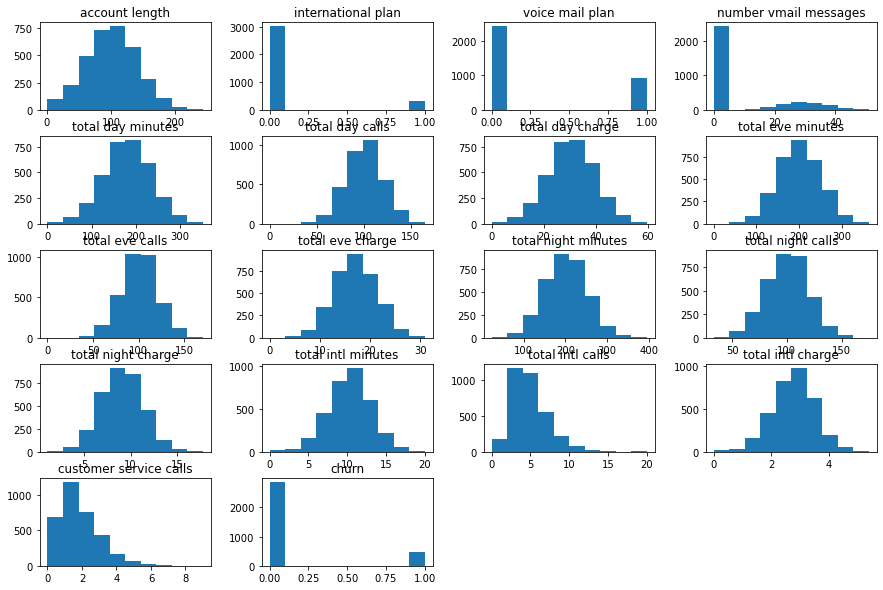

In [29]:
#for numerical
df.hist(grid= False, figsize = (15,10));

In [30]:
df_cat = df[['churn','customer service calls',
             'state','international plan','voice mail plan']]

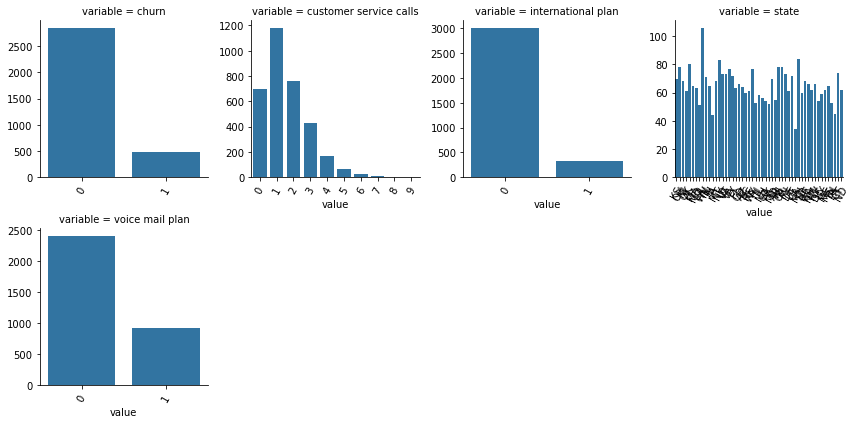

In [31]:
#for categorical

m = pd.melt(df, value_vars=sorted(df_cat))
d = sns.FacetGrid(m, col='variable', 
                  col_wrap=4, 
                  sharex=False, 
                  sharey=False)
plt.xticks(rotation= 'vertical')
d = d.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation= 60) for ax in d.axes.flat]
d.fig.tight_layout()
plt.show()

#### LOL, I think we need to narmalize this thing and ohe state/ also check the skewed data and some imbalace 

### Create training and test sets
- Assign the target column `churn` to y
- Assign the remaining independent variables to X
- Split the data into training and test sets using a 75/25 split
- Set the `random_state` to 42

In [32]:
X = df.drop(columns=['churn'])
y = df.churn

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=42)

#### One hot encoder State

In [34]:
X_train_cat = X_train[["state"]]
X_test_cat = X_test[["state"]]
ohe = OneHotEncoder(categories="auto", sparse=False)
state_ohe_train = ohe.fit_transform(X_train_cat)
state_ohe_test = ohe.transform(X_test_cat)
X_train_cat = pd.DataFrame(state_ohe_train, columns=ohe.categories_[0],index= X_train.index)
X_test_cat = pd.DataFrame(state_ohe_test, columns=ohe.categories_[0],index= X_test.index)
X_train = pd.concat([X_train, X_train_cat], axis=1)
X_test = pd.concat([X_test, X_test_cat], axis=1)
X_train = X_train.drop("state", axis = 1)
X_test = X_test.drop("state", axis = 1)

In [35]:
X_train

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
817,243,0,0,0,95.5,92,16.24,163.7,63,13.91,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1373,108,0,0,0,112.0,105,19.04,193.7,110,16.46,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
679,75,1,0,0,222.4,78,37.81,327.0,111,27.80,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,141,0,0,0,126.9,98,21.57,180.0,62,15.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1993,86,0,0,0,216.3,96,36.77,266.3,77,22.64,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,106,0,0,0,274.4,120,46.65,198.6,82,16.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,122,0,0,0,35.1,62,5.97,180.8,89,15.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,66,0,0,0,87.6,76,14.89,262.0,111,22.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,169,0,0,0,179.2,111,30.46,175.2,130,14.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
print('Training Set: ')
print(y_train.value_counts())
print('Normalized:')
print(y_train.value_counts(normalize=True))
print('\n')
# Test set
print('Test Set')
print(y_test.value_counts())
print('Normalized:')
print(y_test.value_counts(normalize=True))

Training Set: 
0    2284
1     382
Name: churn, dtype: int64
Normalized:
0    0.856714
1    0.143286
Name: churn, dtype: float64


Test Set
0    566
1    101
Name: churn, dtype: int64
Normalized:
0    0.848576
1    0.151424
Name: churn, dtype: float64


#### Optimising for Recall, XGBoost with GridSearchCV 

- Initial XGBoost Model

In [37]:
from xgboost import XGBClassifier, plot_importance

In [38]:
xg = XGBClassifier(random_state = 1)

xg.fit(X_train, y_train)

training_preds = xg.predict(X_train)
test_preds = xg.predict(X_test)

training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 100.0%
Validation accuracy: 95.95%
Training Recall: 100.0%
Test Recall: 79.21%


LOL this must be so wrong

- Follow-Up Model with GridSearchCV

In [39]:
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [6],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100],
}

In [40]:
grid_xg = GridSearchCV(xg, param_grid, 
                       scoring='accuracy', 
                       cv=None, 
                       n_jobs=1)

grid_xg.fit(X_train, y_train)

best_parameters = grid_xg.best_params_

training_preds = grid_xg.predict(X_train)
test_preds = grid_xg.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)
train_recall = recall_score(y_train, training_preds)
test_recall = recall_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))
print('Training Recall: {:.4}%'.format(train_recall * 100))
print('Test Recall: {:.4}%'.format(test_recall * 100))

Training Accuracy: 98.84%
Validation accuracy: 95.35%
Training Recall: 91.88%
Test Recall: 75.25%


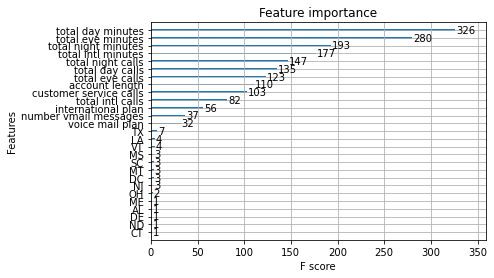

In [41]:
plot_importance(xg)
plt.show()

https://learning.flatironschool.com/courses/4259/assignments/148544?module_item_id=314522

### building different models

In [42]:
def model_building(model_name):
  model = model_name
  model.fit(X_train, y_train)
  print(f"******** Model :- {model_name} ********\n\n")
  print(f"******** Score :- {model.score(X_test, y_test)} ***********")
  print(f"******** Classification Report ************************\n\n")
  y_prediction = model.predict(X_test)
  print(classification_report(y_test, y_prediction))


## dictionary with different models
model_dict = {'dt':DecisionTreeClassifier(criterion='entropy'), 
              'knn':KNeighborsClassifier(n_neighbors=17), 
              'rf': RandomForestClassifier()}


## calling to build and evaluate models
for key in model_dict.keys():
  model_building(model_dict[key])

******** Model :- DecisionTreeClassifier(criterion='entropy') ********


******** Score :- 0.9145427286356822 ***********
******** Classification Report ************************


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       566
           1       0.72      0.72      0.72       101

    accuracy                           0.91       667
   macro avg       0.83      0.84      0.83       667
weighted avg       0.91      0.91      0.91       667

******** Model :- KNeighborsClassifier(n_neighbors=17) ********


******** Score :- 0.8755622188905547 ***********
******** Classification Report ************************


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       566
           1       0.85      0.22      0.35       101

    accuracy                           0.88       667
   macro avg       0.86      0.61      0.64       667
weighted avg       0.87      0.88      0.84     

In [43]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')
logreg.fit(X_train, y_train)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

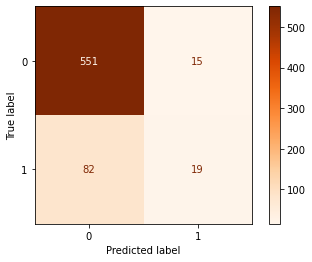

In [44]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test,
                     cmap=plt.cm.Oranges)
plt.show()

#### First ROC curve with Logistic Regression

In [52]:
y_train_score = logreg.decision_function(X_train)
y_test_score = logreg.decision_function(X_test)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))


Train AUC: 0.8346395595125663
Test AUC: 0.817094076898856


In [53]:
#only test to add other models
y_test_score = logreg.decision_function(X_test)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)



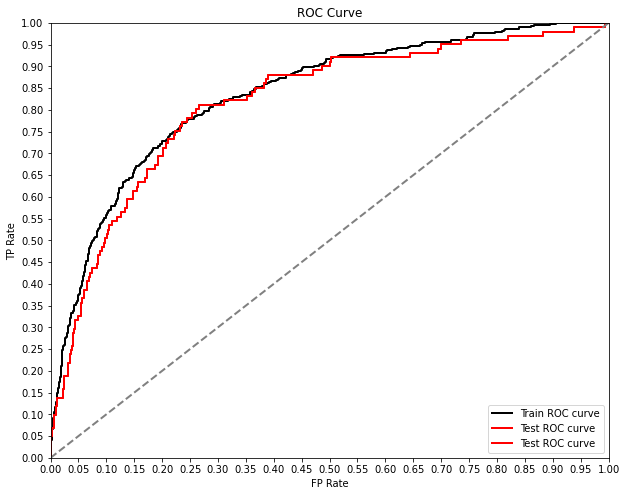

In [54]:
plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='black',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='Test ROC curve')

plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='Test ROC curve')



plt.plot([0, 1], [0, 1], color='grey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Build a "regular" tree as a baseline

In [47]:
# Instantiate and fit a DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

# Feature importance
tree_clf.feature_importances_


array([0.        , 0.10735927, 0.        , 0.05611354, 0.10415905,
       0.00413377, 0.22160706, 0.06401615, 0.        , 0.06594719,
       0.00851218, 0.        , 0.00724778, 0.12058937, 0.08349449,
       0.        , 0.15273051, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00408963, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

### Trying pipeline

### Random Forest: